# Conceptual Exercises

## For the case of a bivariate regression $Y_{i} = \beta_{0} + \beta_{1}X_{i} + \epsilon_{i}$ where $\epsilon_{i} ~ N(0, \sigma^{2})$, show via simulation that:

In [1]:
# import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# set random seed
np.random.seed(2019)
# generate random variables
X = np.random.uniform(1,10, (1000, 1000))
sigma = np.repeat(1,100)

for i in range(2, 11):
    sigma = np.concatenate((sigma, np.repeat(i,100)))
                           
beta0 = 1; beta1 = 2

In [3]:
# Function that processes the OLS estimation and returns the slope and slope_variance estimates
def OLS_est(X, Y):
    X_vars = sm.add_constant(X, prepend=False)
    m = sm.OLS(Y, X_vars)
    res = m.fit(cov_type='HC3')
    return res.params, res.bse

In [4]:
slope = []; se = []

for i in range(1000):
    Y = beta0 + beta1*X[i,] + np.random.normal(0, sigma[i], 1000)
    res = OLS_est(X[i,], Y)
    slope.append(res[0][0])
    se.append(res[1][0])

### The OLS estimator $\hat{\beta_{1}}$ is an unbiased estimator of $\beta_{1}$

Our true function form is: $Y_{i} = 1 + 2X_{i} + \epsilon_{i}$

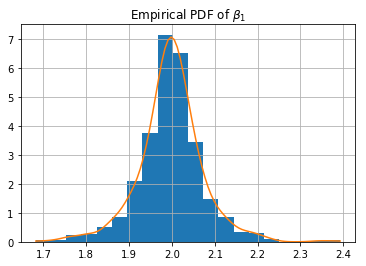

In [5]:
# Plot the empirical density function of estimated slopes
from scipy.stats.kde import gaussian_kde

plt.figure()
plt.hist(slope, density = True, bins = 20)
kde = gaussian_kde(slope)
x_axis = np.linspace(min(slope), max(slope), 100)
plt.plot(x_axis, kde(x_axis))
plt.title("Empirical PDF of " + r"$\beta_{1}$")
plt.grid()
plt.show()

The distribution of the estimated slopes is centered around 2, which is the true slope value.

In [6]:
np.mean(slope)

1.9972215591240314

As we can see from the simulation, after 1000 times of simulation, the average of all the estimated slopes is 1.9972215591240314, which is fairly close to 2. So the OLS estimator should be an unbiased one.

### $Var(\beta_{1}^{2})$ is increasing in $\sigma^{2}$.

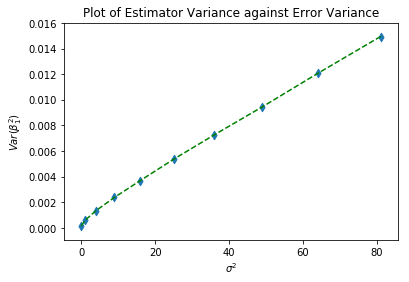

In [7]:
sigma_sq = [i**2 for i in range(10)]
se_est = np.split(np.array(se), list(range(100, 1000, 100)))
se_sq = [np.mean(se_est[i]**2) for i in range(10)]

plt.figure()
plt.plot(sigma_sq, se_sq, linestyle = 'dashed', color = 'green')
plt.scatter(sigma_sq, se_sq, marker = "d")
plt.xlabel(r'$\sigma^{2}$'); plt.ylabel(r"$Var(\beta_{1}^{2})$")
plt.title("Plot of Estimator Variance against Error Variance")
plt.show()

As we can see from the above plot, the $Var(\beta_{1}^{2})$ increases with $\sigma^{2}$.

## Consider a model like: $Y_{i} = \beta_{0} + \beta_{1}X_{1i} + \beta_{2}X_{2i} + \beta_{3}X_{3i} + \epsilon_{i}$. where $Y, X, \epsilon$ meet all the usual assumptions of the classical linear regression model, each $X_{i}$ is a random normal variable, $corr(X_{1}, X_{2}) \in (-1, 1)$ and $corr(X_{1}, X_{3}) = corr(X_{2}, X_{3}) =0$.

Let's specify the true function form as: $Y_{i} = 1 + 2X_{1i} + 3X_{2i} + 4X_{3i} + \epsilon_{i}$

In [8]:
def var_est(size):
    # set random seed
    np.random.seed(2019)
    x_3 = np.random.normal(size = size)
    corr = np.linspace(-0.95, 0.95, 19)

    var1 = []; var3 = []
    for i in corr:
        x_12 = np.random.multivariate_normal(mean = [0, 0], 
                                             cov = [[1, i], [i, 1]], size = size)
        x_1 = x_12[:,0]; x_2 = x_12[:,1]
        y = 1 + 2*x_1 + 3*x_2 + 4*x_3 + np.random.normal(size = size)
        res = OLS_est(np.concatenate((x_12, x_3.reshape(size,1)), axis=1), y)
        var1.append(res[1][0]); var3.append(res[1][2])
    return var1, var3

### The relationship between $corr(X_{1}, X_{2})$ and $se(\hat{\beta_{1}})$ for $N=100$.

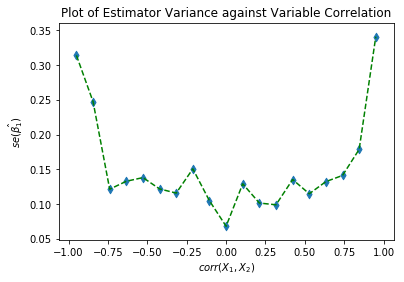

In [9]:
var = var_est(100)[0]
corr = np.linspace(-0.95, 0.95, 19)

plt.figure()
plt.plot(corr, var, linestyle = 'dashed', color = 'green')
plt.scatter(corr, var, marker = "d")
plt.xlabel(r'$corr(X_{1}, X_{2})$'); plt.ylabel(r"$se(\hat{\beta_{1}})$")
plt.title("Plot of Estimator Variance against Variable Correlation")
plt.show()

When the magnitude of the correlation is large, the estimate will be very variant. The estimate is most accurate when the correlation is weak. The curve is therefore bowl-shaped.

### The relationship between $corr(X_{1}, X_{2})$ and $se(\hat{\beta_{3}})$ for $N=100$.

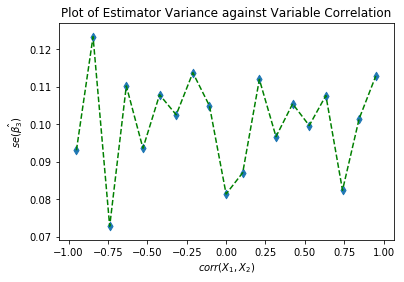

In [10]:
var = var_est(100)[1]

plt.figure()
plt.plot(corr, var, linestyle = 'dashed', color = 'green')
plt.scatter(corr, var, marker = "d")
plt.xlabel(r'$corr(X_{1}, X_{2})$'); plt.ylabel(r"$se(\hat{\beta_{3}})$")
plt.title("Plot of Estimator Variance against Variable Correlation")
plt.show()

No clear relationship implied.

### How the relationship changes as $N \rightarrow \infty$

The relationship between $corr(X_{1}, X_{2})$ and $se(\hat{\beta_{1}})$  as $N \rightarrow \infty$.

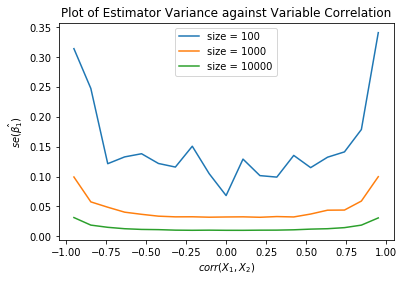

In [11]:
plt.figure()

for size in (100, 1000, 10000):
    var = var_est(size)[0]    
    plt.plot(corr, var, label = "size = {}".format(size))
plt.legend()     
plt.xlabel(r'$corr(X_{1}, X_{2})$'); plt.ylabel(r"$se(\hat{\beta_{1}})$")
plt.title("Plot of Estimator Variance against Variable Correlation")
plt.show()

The relationship between $corr(X_{1}, X_{2})$ and $se(\hat{\beta_{3}})$  as $N \rightarrow \infty$.

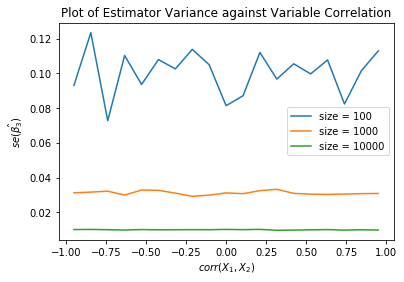

In [12]:
plt.figure()

for size in (100, 1000, 10000):
    var = var_est(size)[1]    
    plt.plot(corr, var, label = "size = {}".format(size))
plt.legend()     
plt.xlabel(r'$corr(X_{1}, X_{2})$'); plt.ylabel(r"$se(\hat{\beta_{3}})$")
plt.title("Plot of Estimator Variance against Variable Correlation")
plt.show()

As we can see from the two graphs, the variance of the slope estimates all become strictly smaller as $N$ grows, and the plots are getting smoother as there are more observations.

# Applied Exercises

## Sexy Biden

In [13]:
#import the data
data = pd.read_csv("data/nes2008.csv")

In [14]:
data.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


### Plot a histogram of biden with a binwidth of 1. Make sure to give the graph a title and proper $x$ and $y$-axis labels. In a few sentences, describe any interesting features of the graph.

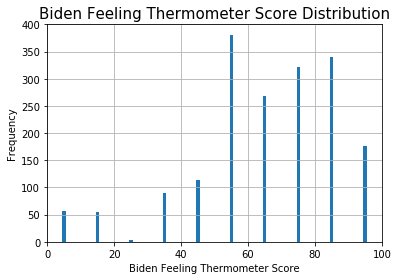

In [15]:
plt.hist(data['biden'], rwidth = 0.1)
plt.xlabel("Biden Feeling Thermometer Score"); plt.ylabel("Frequency")
plt.title("Biden Feeling Thermometer Score Distribution", size = 15)
plt.grid()
plt.show()

### Estimate the following linear regression: $Y = \beta_{0} + \beta_{1}X_{1}$. where $Y$ is the Joe Biden feeling thermometer and $X_{1}$ is age. Report the parameters and standard errors.

In [16]:
X_var = sm.add_constant(data['age'])
m = sm.OLS(data['biden'], X_var)
res = m.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.649
Date:                Mon, 21 Jan 2019   Prob (F-statistic):             0.0563
Time:                        00:13:27   Log-Likelihood:                -8263.5
No. Observations:                1807   AIC:                         1.653e+04
Df Residuals:                    1805   BIC:                         1.654e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1974      1.648     35.922      0.000      55.965      62.429
age            0.0624      0.033      1.910      0.056      -0.002       0.126
==============================================================================
Omnibus:                       69.945   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.277
Skew:                          -0.503   Prob(JB):                     1.66e-17
Kurtosis:                       3.128   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Is there a relationship between the predictor and the response?

As we can see from the report, there is a positive relationship between interviewee ages and Biden Thermometer Rating. The null can be rejected at the 95% confidence level.

#### How strong is the relationship between the predictor and the response?

The relationship is weak. One year increase in age is only associated with 0.0624 increase Biden Thermometer Rating, which is trivial compared to a 0-100 scale

#### Is the relationship between the predictor and the response positive or negative?

The relationship is positive.

#### Report the $R^{2}$ of the model. What percentage of the variation in biden does age alone explain? Is this a good or bad model?

The $R^{2}$ is **0.002**, which means **0.2%** of the variation in biden can be explained by age. In terms of prediction power, the model performs very poorly.

#### What is the predicted biden associated with an age of 45? What are the associated 95% confidence intervals?

In [17]:
res.predict([1,45])

array([62.00560104])

In [18]:
res.get_prediction([1,45]).conf_int()

array([[60.91177148, 63.09943059]])

As the prediction shows, the predicted biden at age=45 is **62**, with a 95% confidence interval of **(60.92, 63.10)**.

#### Plot the response and predictor. Draw the least squares regression line.

In [19]:
predictor = sm.add_constant(np.arange(18, 101))
response = res.predict(predictor)
conf_int = res.get_prediction(predictor).conf_int()

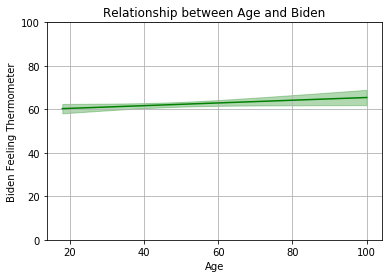

In [20]:
plt.plot(predictor[:,1], response, color='green')
plt.fill_between(predictor[:,1], conf_int[:,1], conf_int[:,0], color = 'green', alpha = 0.3)
plt.ylim([0,100])
plt.xlabel("Age"); plt.ylabel("Biden Feeling Thermometer")
plt.title("Relationship between Age and Biden")
plt.grid()
plt.show()

### It is unlikely age alone shapes attitudes towards Joe Biden. Estimate the following linear regression: $Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{3}$,  where $Y$ is the Joe Biden feeling thermometer, $X_{1}$ is age, $X_{2}$ is gender, and $X_{3}$ is education. Report the parameters and standard errors.

In [21]:
X_var_2 = sm.add_constant(data[['age', 'female', 'educ']])
m = sm.OLS(data['biden'], X_var_2)
res_2 = m.fit()

res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     16.82
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           8.88e-11
Time:                        00:13:27   Log-Likelihood:                -8240.4
No. Observations:                1807   AIC:                         1.649e+04
Df Residuals:                    1803   BIC:                         1.651e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.6210      3.596     19.083      0.000      61.568      75.674
age            0.0419      0.032      1.289      0.198      -0.022       0.106
female         6.1961      1.097      5.650      0.000       4.045       8.347
educ          -0.8887      0.225     -3.955      0.000      -1.329      -0.448
==============================================================================
Omnibus:                       62.024   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.837
Skew:                          -0.474   Prob(JB):                     1.86e-15
Kurtosis:                       3.056   Cond. No.                         344.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Is there a statistically significant relationship between the predictors and response?

As reported above, gender and education are significantly related to Biden Scores, while age is not a significant predictor.

#### What does the parameter for female suggest?

Condition on age and education, females' feeling towards Biden is, on average, higher than males by a degree of 6.1961 Biden Score.

#### Report the $R^{2}$ of the model. What percentage of the variation in biden does age, gender, and education explain? Is this a better or worse model than the age-only model?

The $R^{2}$ here is 0.027, which indicates that 2.7% of the variation in biden can be explained by all these predictor together. In regards to prediction, the model works relatively better than the previous single-predictor model.

#### Generate a plot comparing the predicted values and residuals, drawing separate smooth fit lines for each party ID type. Is there a problem with this model? If so, what?

In [22]:
residual = res_2.resid
response = res_2.predict()

data['pred'] = response; data['resid'] = residual

In [23]:
dem = data[data['dem']==1]
rep = data[data['rep']==1]
ind = data[(data['dem']==0) & (data['rep']==0)]

In [24]:
lowess = sm.nonparametric.lowess
z_dem = lowess(dem['resid'], dem['pred'], frac = 0.5)
z_rep = lowess(rep['resid'], rep['pred'], frac = 0.5)
z_ind = lowess(ind['resid'], ind['pred'], frac = 0.5)

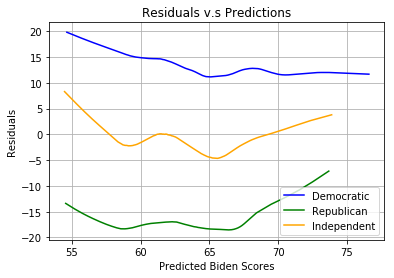

In [25]:
plt.plot(z_dem[:,0],z_dem[:,1], color = 'b', label = "Democratic")
plt.plot(z_rep[:,0],z_rep[:,1], color = 'g', label = "Republican")
plt.plot(z_ind[:,0],z_ind[:,1], color = 'orange', label = "Independent")
plt.xlabel("Predicted Biden Scores"); plt.ylabel("Residuals")
plt.title("Residuals v.s Predictions")
plt.legend()
plt.grid()
plt.show()

Yes, there is some problem. The graph can demonstrate that the residuals associated with different parties are significantly divergent. The democratic tend to be overestimated while the republican tend to be underpredicted. By including party ID type into the predictors, we might be able to eliminate such bias.

### Estimate the following linear regression: $Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{3} + \beta_{4}X_{4} + \beta_{5}X_{5}$, where $Y$ is the Joe Biden feeling thermometer, $X_{1}$ is age, $X_{2}$ is gender, $x_{3}$ is education, $X_{4}$ is Democrat, and $X_{5}$ is Republican. Report the parameters and standard errors.

In [26]:
X_var = sm.add_constant(data[['age', 'female', 'educ', 'dem', 'rep']])
m = sm.OLS(data['biden'], X_var)
res_3 = m.fit()

res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 21 Jan 2019   Prob (F-statistic):          1.50e-126
Time:                        00:13:28   Log-Likelihood:                -7966.6
No. Observations:                1807   AIC:                         1.595e+04
Df Residuals:                    1801   BIC:                         1.598e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8113      3.124     18.823      0.000      52.683      64.939
age            0.0483      0.028      1.708      0.088      -0.007       0.104
female         4.1032      0.948      4.327      0.000       2.243       5.963
educ          -0.3453      0.195     -1.773      0.076      -0.727       0.037
dem           15.4243      1.068     14.442      0.000      13.330      17.519
rep          -15.8495      1.311    -12.086      0.000     -18.421     -13.278
==============================================================================
Omnibus:                       87.979   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.940
Skew:                          -0.533   Prob(JB):                     7.31e-23
Kurtosis:                       3.466   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Did the relationship between gender and Biden warmth change?

The relationship changed slightly. In the previous three-variable model, being a female is associated with an increase in Biden score by 6.1961, while after including party ID types into the model, we can see that female scores are 4.1032 higher, certeris paribus. This implies that party memeberships might have captured some missed information in the previous model.

#### Report the $R^{2}$ of the model. What percentage of the variation in biden does age, gender, education, and party identification explain? Is this a better or worse model than the age + gender + education model?

According to the OLS results, the five_variable model has an $R^{2}$ of 0.282, which means 28.2% of the variation in biden can be explained by the model. In contrast, the three-variable model only explains 2.7%. So this is a great improvement in explanatory power.

#### Generate a plot comparing the predicted values and residuals, drawing separate smooth fit lines for each party ID type. By adding variables for party ID to the regression model, did we fix the previous problem?

In [27]:
residual = res_3.resid
response = res_3.predict()

data['pred_3'] = response; data['resid_3'] = residual

dem_3 = data[data['dem']==1]
rep_3 = data[data['rep']==1]
ind_3 = data[(data['dem']==0) & (data['rep']==0)]

lowess_3 = sm.nonparametric.lowess
z_dem_3 = lowess_3(dem_3['resid_3'], dem_3['pred_3'], frac = 1/4)
z_rep_3 = lowess(rep_3['resid_3'], rep_3['pred_3'], frac = 1/4)
z_ind_3 = lowess(ind_3['resid_3'], ind_3['pred_3'], frac = 1/4)

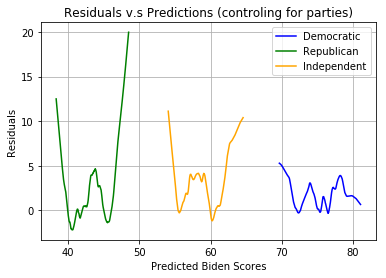

In [28]:
plt.plot(z_dem_3[:,0],z_dem_3[:,1], color = 'b', label = "Democratic")
plt.plot(z_rep_3[:,0],z_rep_3[:,1], color = 'g', label = "Republican")
plt.plot(z_ind_3[:,0],z_ind_3[:,1], color = 'orange', label = "Independent")
plt.xlabel("Predicted Biden Scores"); plt.ylabel("Residuals")
plt.title("Residuals v.s Predictions (controling for parties)")
plt.legend()
plt.grid()
plt.show()

From the graph, we can see that residuals are no longer marked with different mean levels across different parties. But we can also notice the three party types have different levels of variance in Biden scores.

### Let’s explore this relationship between gender and Biden warmth more closely. Perhaps the effect of gender on Biden warmth differs between partisan affiliation. That is, not only do we need to account for the effect of party ID in our linear regression model, but that gender has a different effect for Democrats and Republicans. Democrats are already predisposed to favor Joe Biden and have warm thoughts about him, whereas Republicans are predisposed to dislike him. But because Biden is so charming, he can woo female Republicans better than male Republicans. This suggests an interactive relationship between gender and party ID. Filter your dataset to remove any independent respondents (keeping only those who identify as Democrats or Republicans), and estimate the following linear regression: $Y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \beta_{3}X_{1}X_{2}$, where $Y$ is the Joe Biden feeling thermometer, $X_{1}$ is gender, and $X_{2}$ is Democrat. Report the parameters and standard errors. Estimate predicted Biden warmth feeling thermometer ratings and 95% confidence intervals for female Democrats, female Republicans, male Democrats, and male Republicans. Does the relationship between party ID and Biden warmth differ for males/females? Does the relationship between gender and Biden warmth differ for Democrats/Republicans?

In [29]:
data['inter'] = data['female'] * data['dem']
data_new = data[(data['dem']==1) | (data['rep']==1)]

X_var = sm.add_constant(data_new[['female', 'dem', 'inter']])
m = sm.OLS(data_new['biden'], X_var)
res_4 = m.fit()

res_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 21 Jan 2019   Prob (F-statistic):          8.30e-117
Time:                        00:13:28   Log-Likelihood:                -5045.2
No. Observations:                1151   AIC:                         1.010e+04
Df Residuals:                    1147   BIC:                         1.012e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.3820      1.455     27.060      0.000      36.527      42.237
female         6.3952      2.018      3.169      0.002       2.436      10.354
dem           33.6875      1.835     18.360      0.000      30.088      37.287
inter         -3.9459      2.472     -1.597      0.111      -8.795       0.903
==============================================================================
Omnibus:                       56.061   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.141
Skew:                          -0.554   Prob(JB):                     1.95e-14
Kurtosis:                       3.302   Cond. No.                         9.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
res_4.predict([[1,1,1,1],[1,1,0,0],[1,0,1,0],[1,0,0,0]])

array([75.51882845, 45.77720207, 73.06953642, 39.38202247])

In [31]:
res_4.get_prediction([[1,1,1,1],[1,1,0,0],[1,0,1,0],[1,0,0,0]]).conf_int()

array([[73.77632342, 77.26133348],
       [43.03493762, 48.51946652],
       [70.8773145 , 75.26175835],
       [36.52654994, 42.23749501]])

**Estimated Biden Warmth and Confidence Intervals**

| Party*Gender | Prediction | 95% Confidence Interval |
| ---------------------- | --------------- | ----------|
| Female Democrats | 75.52 | [73.78, 77.26] |
| Female Republican | 45.78 | [43.03, 48.52] |
| Male Democrats | 73.07 | [70.88, 75.26] |
| Male Republican | 39.38 | [36.52, 42.23] |


From the table, we can calculate the gaps:

* Within females, the Biden gap between Democrats and Republicans is 29.74; Within males, the Biden gap between the two parties is 33.69
* Within Democrats, the Biden gap between genders is 2.45; With in Republicans, the gender gap is 6.40

Therefore, the relationship between Party ID and Biden warmth does not change significantly with genders, except that males are a tiny bit more diverged; However, the relationship between gender and Biden warmth changes with party IDs, with the party gap being larger for Republicans.

## Modeling Voter Turnout

In [32]:
mh = pd.read_csv("data/mental_health.csv")

In [33]:
mh.head()

,vote96,mhealth_sum,age,educ,black,female,married,inc10
0,1.0,0.0,60.0,12.0,0,0,0.0,4.8149
1,1.0,NaN,27.0,17.0,0,1,0.0,1.7387
2,1.0,1.0,36.0,12.0,0,0,1.0,8.8273
3,0.0,7.0,21.0,13.0,0,0,0.0,1.7387
4,0.0,NaN,35.0,16.0,0,1,0.0,4.8149


### Plot a histogram of voter turnout. Make sure to give the graph a title and proper $x$ and $y$-axis labels. What is the unconditional probability of a given individual turning out to vote?

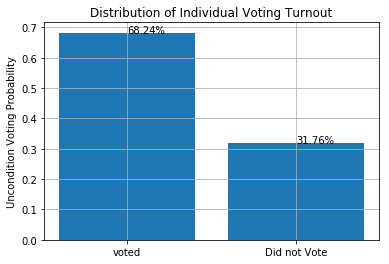

In [34]:
turnout = mh['vote96'].dropna()
freq = [turnout.sum()/turnout.shape[0]]; freq.append(1-freq[0])

fig, ax = plt.subplots()
plt.bar(['voted', 'Did not Vote'], freq)
ax.text(0, freq[0], "{:.2%}".format(freq[0]))
ax.text(1, freq[1], "{:.2%}".format(freq[1]))
plt.ylabel("Uncondition Voting Probability")
plt.title("Distribution of Individual Voting Turnout")
plt.grid()
plt.show()

Therefore, the unconditional probability of a given individual to vote is 68.24%.

### Estimate a logistic regression model of the relationship between mental health and voter turnout.

In [35]:
mh_2 = mh[['vote96', 'mhealth_sum']].dropna(how = 'any')

# Check there are no missing values left
mh_2.isnull().apply(sum, axis=0)

vote96         0
mhealth_sum    0
dtype: int64

In [36]:
X_var = sm.add_constant(mh_2['mhealth_sum'])

m = sm.GLM(mh_2['vote96'], X_var, family=sm.families.Binomial())
res = m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 vote96   No. Observations:                 1322
Model:                            GLM   Df Residuals:                     1320
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -808.36
Date:                Mon, 21 Jan 2019   Deviance:                       1616.7
Time:                        00:13:28   Pearson chi2:                 1.32e+03
No. Iterations:                     4   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1392      0.084     13.491      0.000       0.974       1.305
mhealth_sum    -0.1435      0.020     -7.289      0.000      -0.182      -0.105
===============================================================================
"""

#### Is the relationship between mental health and voter turnout statistically and/or substantively significant?

As we can see from the logistic regression result, the mhealth_sum may lower the probability of voting, and the estimate is statistically significant, with a p-value of 0.000. However, we'd better be cautious to state whether the effect is substantative, as the linear form only represents the log-odds.

#### Interpret the estimated parameter for mental health in terms of log-odds. Generate a graph of the relationship between mental health and the log-odds of voter turnout.

In [37]:
mhealth_sort = mh_2['mhealth_sum'].sort_values()

pred = res.params[0] + res.params[1]*mhealth_sort

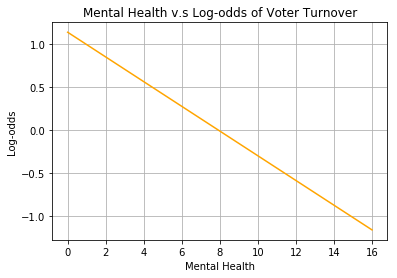

In [38]:
plt.plot(mhealth_sort, pred, color = 'orange')
plt.xlabel("Mental Health"); plt.ylabel("Log-odds")
plt.title("Mental Health v.s Log-odds of Voter Turnover")
plt.grid()
plt.show()

For every unit increase in mhealth_sum, the log-odds of the probabilibity of voting will decrease by 0.1435

#### Interpret the estimated parameter for mental health in terms of odds. Generate a graph of the relationship between mental health and the odds of voter turnout.

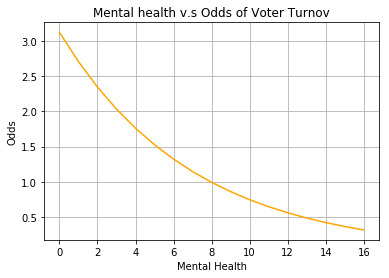

In [39]:
plt.plot(mhealth_sort, np.exp(pred), color = 'orange')
plt.xlabel("Mental Health"); plt.ylabel("Odds")
plt.title("Mental health v.s Odds of Voter Turnov")
plt.grid()
plt.show()

When thinking of the odds, we can find each unit increase in mental health index, the odds will approximately decrease by 14.35%.

#### Interpret the estimated parameter for mental health in terms of probabilities. Generate a graph of the relationship between mental health and the probability of voter turnout. What is the first difference for an increase in the mental health index from 1 to 2? What about for 5 to 6?

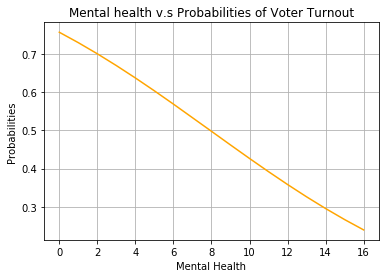

In [40]:
cal_prob = lambda x: 1/(1 + np.exp(-x))
pred_1 = cal_prob(pred)

plt.plot(mhealth_sort, pred_1, color = 'orange')
plt.xlabel("Mental Health"); plt.ylabel("Probabilities")
plt.title("Mental health v.s Probabilities of Voter Turnout")
plt.grid()
plt.show()

Increase in mental health index is going to reduce the probability of casting ballots, but the relationship is not linear.

#### Estimate the accuracy rate, proportional reduction in error (PRE), and the AUC for this model. Do you consider it to be a good model?

In [41]:
# Accuracy Rate
# Here we choose the threshold as 0.5
pred1 = res.predict()

ar = 1 - ((pred1 > 0.5) ^ (mh_2['vote96'].values==1)).sum()/len(pred1)
print("Accuracy Rate: {:.2%}".format(ar))

Accuracy Rate: 67.78%


In [42]:
# Error rate with only a constant
error_const = 1 - mh_2['vote96'].sum()/mh_2.shape[0]

# Proportional Reduction in Error
pre = (error_const - (1 - ar))/error_const
print("Proportional Reduction in Error: {:.2%}".format(pre))

Proportional Reduction in Error: 1.62%


In [43]:
# Area Under the Curve
from sklearn import metrics

y = mh_2['vote96']
pred = pred1
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC score: {:.2%}".format(auc))

AUC score: 62.43%


From my perspective, all these three evaluation methods indicate the model to be relatively weak in prediction power. This is not a very satisfactory model.

### Using the other variables in the dataset, derive and estimate a multiple variable logistic regression model of voter turnout. Interpret the results in paragraph format. This should include a discussion of your results as if you were reviewing them with fellow computational social scientists. Discuss the results using any or all of log-odds, odds, predicted probabilities, and first differences - choose what makes sense to you and provides the most value to the reader. Use graphs and tables as necessary to support your conclusions.

In [44]:
mh_3 = mh.dropna(how = 'any')

# Check there are no missing values left
mh_3.isnull().apply(sum, axis=0)

vote96         0
mhealth_sum    0
age            0
educ           0
black          0
female         0
married        0
inc10          0
dtype: int64

In [45]:
X_var = sm.add_constant(mh_3.iloc[:,1:])

m_2 = sm.GLM(mh_3['vote96'], X_var, family=sm.families.Binomial())
res_2 = m_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 vote96   No. Observations:                 1165
Model:                            GLM   Df Residuals:                     1157
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -620.88
Date:                Mon, 21 Jan 2019   Deviance:                       1241.8
Time:                        00:13:29   Pearson chi2:                 1.17e+03
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.3041      0.508     -8.471      0.000      -5.300      -3.308
mhealth_sum    -0.0891      0.024     -3.769      0.000      -0.135      -0.043
age             0.0425      0.005      8.835      0.000       0.033       0.052
educ            0.2287      0.030      7.744      0.000       0.171       0.287
black           0.2730      0.203      1.347      0.178      -0.124       0.670
female         -0.0170      0.140     -0.121      0.904      -0.291       0.257
married         0.2969      0.153      1.939      0.053      -0.003       0.597
inc10           0.0696      0.027      2.624      0.009       0.018       0.122
===============================================================================
"""

Here we included all the variables that can potentially affect individuals' decision to cast ballots, namely mhealth_sum, age, education, black or not, marriage status, and income. Compared to the previous model, the coefficient of **mhealth_sum** has been substantially assuaged (from -0.1435 down to -0.0891, statistically significant), but still poses a negative effect on the probability of voter turnout. 

In general, all the other variables, except female, seem to impact the voting behavior positively. With all other variables held constant, one year increase in **age** is associated with an increase in the log-odds by 0.0425, significant at the 1 percent level; one year increase in **education** is associated with an increase in the log-odds by 0.2287, significant at the 1 percent level; **being black** is associated with an increase in the log-odds by 0.2730, though the coefficient is not statistically significant; **being female** reduces the log-odds by 0.0170, insignificant either; **being married** is associated with 0.2969 increase in log-odds, marginally significant at 5 percent level; **earning** $10,000 more is associated with 0.009 increase in the log-odds, significant too.

However, since the effects are not linear, we can't vaguely state whether these effects are substantative or not. Below I'll show some graphical interpretations under various scenarios.

In [46]:
def model_pred(res, x):
    coe = res.params
    pred = coe[0]*x[:,0] + coe[1]*x[:,1] + coe[2]*x[:,2] + coe[3]*x[:,3] +\
        coe[4]*x[:,4] + coe[5]*x[:,5] + coe[6]*x[:,6] + coe[7]*x[:,7]
    return 1/(1 + np.exp(-pred))

In [47]:
centers = X_var.mean(axis = 0)

# Voter Turnout v.s Mental Health on different age/income/education levels, holding all the other variables at their centers
x = np.full(shape = (100, 8), fill_value = 1.0)
x[:,1] = np.arange(1,101)
for i in range(2,8):
    x[:,i] = np.repeat(centers[i], 100)

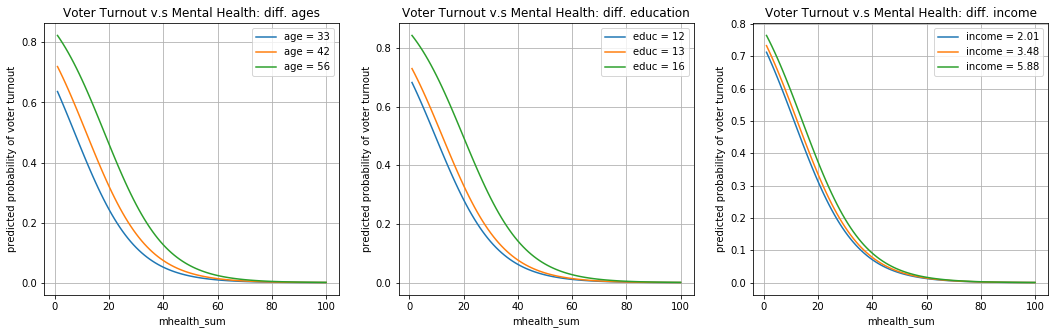

In [48]:
fig = plt.figure(figsize = (18, 5))

# At different age levels
ax = fig.add_subplot(1,3,1)
x[:, 2] = np.repeat(33, 100)
pred_age = model_pred(res_2, x)
ax.plot(x[:,1], pred_age, label = "age = 33")
x[:, 2] = np.repeat(42, 100)
pred_age = model_pred(res_2, x)
ax.plot(x[:,1], pred_age, label = "age = 42")
x[:, 2] = np.repeat(56, 100)
pred_age = model_pred(res_2, x)
ax.plot(x[:,1], pred_age, label = "age = 56")
plt.xlabel("mhealth_sum"); plt.ylabel("predicted probability of voter turnout")
plt.legend()
plt.grid()
plt.title("Voter Turnout v.s Mental Health: diff. ages")
x[:,2] = np.repeat(centers[2], 100)

# At different education levels
ax = fig.add_subplot(1,3,2)
x[:, 3] = np.repeat(12, 100)
pred_educ = model_pred(res_2, x)
ax.plot(x[:,1], pred_educ, label = "educ = 12")
x[:, 3] = np.repeat(13, 100)
pred_educ = model_pred(res_2, x)
ax.plot(x[:,1], pred_educ, label = "educ = 13")
x[:, 3] = np.repeat(16, 100)
pred_educ = model_pred(res_2, x)
ax.plot(x[:,1], pred_educ, label = "educ = 16")
plt.xlabel("mhealth_sum"); plt.ylabel("predicted probability of voter turnout")
plt.legend()
plt.grid()
plt.title("Voter Turnout v.s Mental Health: diff. education")
x[:,3] = np.repeat(centers[3], 100)

# At different income levels
ax = fig.add_subplot(1,3,3)
x[:, 7] = np.repeat(2.01, 100)
pred_inc = model_pred(res_2, x)
ax.plot(x[:,1], pred_inc, label = "income = 2.01")
x[:, 7] = np.repeat(3.48, 100)
pred_inc = model_pred(res_2, x)
ax.plot(x[:,1], pred_inc, label = "income = 3.48")
x[:, 7] = np.repeat(5.88, 100)
pred_inc = model_pred(res_2, x)
ax.plot(x[:,1], pred_inc, label = "income = 5.88")
plt.xlabel("mhealth_sum"); plt.ylabel("predicted probability of voter turnout")
plt.legend()
plt.grid()
plt.title("Voter Turnout v.s Mental Health: diff. income")
x[:,7] = np.repeat(centers[7], 100)

plt.show()

The above three graphs show the **probabilities of voting agains mental health indices**, holding all other variables at their sample data centers. The probability still goes down with mental health. We also plotted the curves at different levels of age, education and income. The higher of these variables, the more likely the individuals are going to vote.

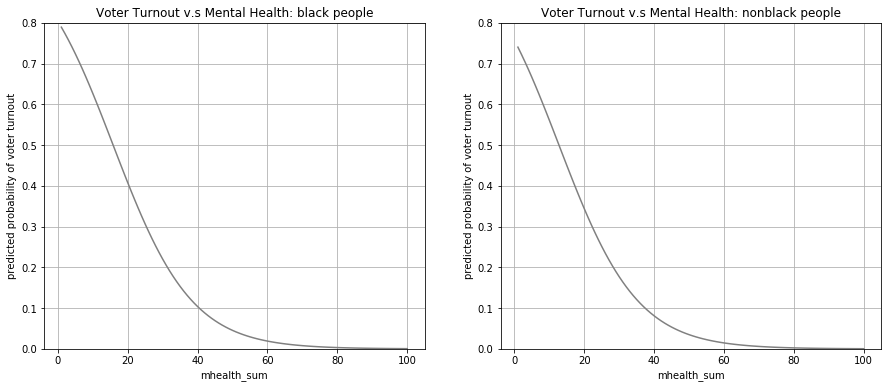

In [49]:
fig = plt.figure(figsize = (15, 6))

# Black
ax = fig.add_subplot(1,2,1)
x[:, 4] = np.repeat(1, 100)
pred_black = model_pred(res_2, x)
ax.plot(x[:,1], pred_black, color = "grey")
plt.xlabel("mhealth_sum"); plt.ylabel("predicted probability of voter turnout")
plt.grid()
plt.ylim((0,0.8))
plt.title("Voter Turnout v.s Mental Health: black people")

# Non-black
ax = fig.add_subplot(1,2,2)
x[:, 4] = np.repeat(0, 100)
pred_nonblack = model_pred(res_2, x)
ax.plot(x[:,1], pred_nonblack, color = "grey")
plt.xlabel("mhealth_sum"); plt.ylabel("predicted probability of voter turnout")
plt.grid()
plt.ylim((0,0.8))
plt.title("Voter Turnout v.s Mental Health: nonblack people")

x[:,4] = np.repeat(centers[4], 100)

By comparing the plots of **black against non-black people** (with all other variables at their sample data centers), we can find that balck people are more prone to voting, certeris paribus.

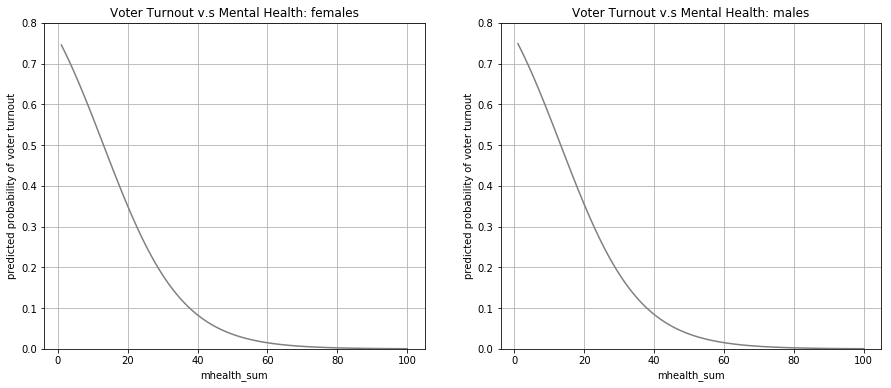

In [50]:
fig = plt.figure(figsize = (15, 6))

# Female
ax = fig.add_subplot(1,2,1)
x[:, 5] = np.repeat(1, 100)
pred_female = model_pred(res_2, x)
ax.plot(x[:,1], pred_female, color = "grey")
plt.xlabel("mhealth_sum"); plt.ylabel("predicted probability of voter turnout")
plt.grid()
plt.ylim((0,0.8))
plt.title("Voter Turnout v.s Mental Health: females")

# Male
ax = fig.add_subplot(1,2,2)
x[:, 5] = np.repeat(0, 100)
pred_male = model_pred(res_2, x)
ax.plot(x[:,1], pred_male, color = "grey")
plt.xlabel("mhealth_sum"); plt.ylabel("predicted probability of voter turnout")
plt.grid()
plt.ylim((0,0.8))
plt.title("Voter Turnout v.s Mental Health: males")

x[:,5] = np.repeat(centers[5], 100)

By comparing the plots of **females against males** (with all other variables at their sample data centers), we can roughly see that males are more likely than females to vote, certeris paribus.

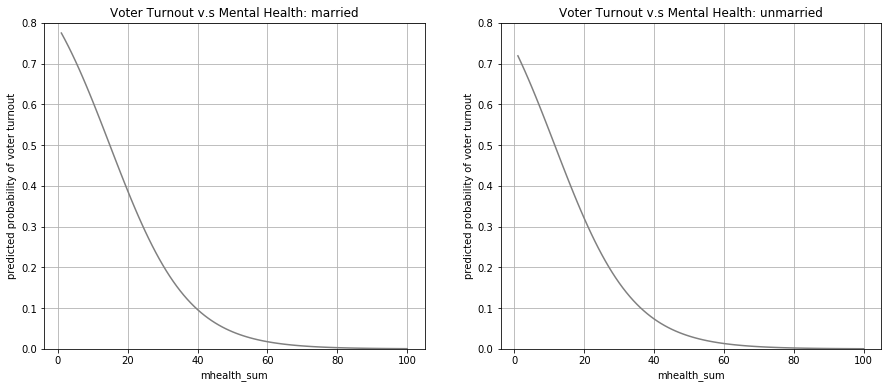

In [51]:
fig = plt.figure(figsize = (15, 6))

# Married
ax = fig.add_subplot(1,2,1)
x[:, 6] = np.repeat(1, 100)
pred_mary = model_pred(res_2, x)
ax.plot(x[:,1], pred_mary, color = "grey")
plt.xlabel("mhealth_sum"); plt.ylabel("predicted probability of voter turnout")
plt.grid()
plt.ylim((0,0.8))
plt.title("Voter Turnout v.s Mental Health: married")

# Male
ax = fig.add_subplot(1,2,2)
x[:, 6] = np.repeat(0, 100)
pred_unmary = model_pred(res_2, x)
ax.plot(x[:,1], pred_unmary, color = "grey")
plt.xlabel("mhealth_sum"); plt.ylabel("predicted probability of voter turnout")
plt.grid()
plt.ylim((0,0.8))
plt.title("Voter Turnout v.s Mental Health: unmarried")

x[:,6] = np.repeat(centers[6], 100)

By comparing the plots of **married people against unmarried people** (with all other variables at their sample data centers), we can roughly see that the married people are more likely than the unmarried to vote, certeris paribus.

In [52]:
# Error rate with only a constant
pred2 = res_2.predict()
ar_2 = 1 - ((pred2 > 0.5) ^ (mh_3['vote96'].values==1)).sum()/len(pred2)

# Proportional Reduction in Error
pre = (error_const - (1 - ar_2))/error_const
print("Accuracy rate: {:.2%}".format(ar_2), "Proportional Reduction in Error: {:.2%}".format(pre), sep = "\n")

Accuracy rate: 72.36%
Proportional Reduction in Error: 15.61%


Obviously, in terms of data fitness, the new model has hit a big improvement compared to the one that contains only mhealth_sum, though the accuracy rate is not sufficiently high. We may search through more flexible models, such as tree-based models, and see if we can further improve the model predicting power.